# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 5 - Vollständige Listen

<br>
<i>Die Aufgaben wurden entnommen aus 
<br>
<br>
G. von Randow<br>
Das Ziegenproblem<br>
Rowohlt 1992/2004
</i>
<br>
<br>

In [1]:
%run zufall/start

### Aufgabe S47
In einer von zwei Urnen liegen drei weiße und vier schwarze Kugeln, in der ande- <br>
ren vier weiße und drei schwarze. Es wird zufällig in die eine oder die andere Urne <br>
gegriffen und eine Kugel entnommen. Wie groß ist die Wahrscheinlichkeit, dass die<br>
Kugel weiß ist?<br>

<img src='bilder/aufgabes47.png', align='left'>

Das Experiment ist zweistufig, es wird durch seine vollständige Liste beschrieben,<br>
wobei die Werte 1/2 die Wahrscheinlichkeit sind, die entsprechende Urne auszuwählen

In [2]:
ze = ZE( [ ('links', 1/2),  [ ('weiss', 3), ('schwarz', 4) ],
         ('rechts', 1/2), [ ('weiss', 4), ('schwarz', 3) ] ] )

Die gesuchte Wahrscheinlichkeit kann über das Baumdiagramm

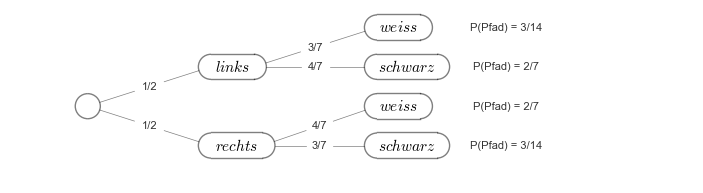

In [3]:
ze.baum

oder direkt berechnet werden

In [5]:
ze.P('linksweiss') + ze.P('rechtsweiss')

1/2

### Aufgabe S138
Ein farbenblinder Elefant steht vor fünf Urnen:
<br>
<br>
2 Urnen sind vom Typ $A_1$ mit je 2 weißen und 2 schwarzen Bällen,<br>
2 Urnen vom Typ $A_2$ mit je einem weißen und 4 schwarzen,<br>
1 Urne vom Typ $A_3$ mit 4 weißen und einem schwarzen Ball.<br>
<br>
Der Elefant rüsselt sich einen Ball aus einer Urne. Der Ball ist weiß. <br>
<br>
Wie groß ist die Wahrscheinlichkeit, dass der Ball aus der Urne vom Typ $A_3$ <br>
stammt?
<br>
<br>

Das ZufallsExperiment wird über seine vollständige Liste erzeugt

In [2]:
A1, A2, A3 = symbols('A1 A2 A3')

elefant = e = ZE( [ (A1, 2), [ (w, 2), (s, 3) ], 
                    (A2, 2), [ (w, 1), (s, 4) ],
                    (A3, 1), [ (w, 4), (s, 1) ] ] )

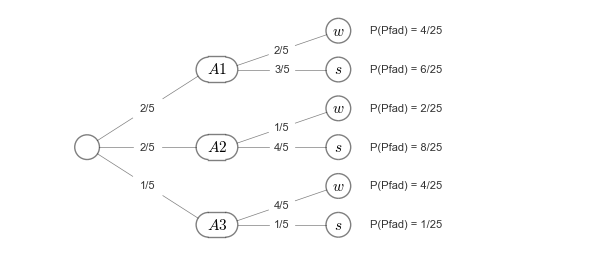

In [3]:
e.baum

Anhand des Baumes kann die (bedingte) Wahrscheinlichkeit unter direkter Ver-<br>
wendung des Satzes von Bayes berechnet werden. Eine günstigere Möglichkeit<br>
wird im weiteren beschrieben
<br>
<br>
Im Ereignis $W$ ="Die Kugel ist weiß" werden alle Pfade zusammengefaßt, die zu <br>
einer weißen Kugel führen

In [4]:
W = { *symbols('A1w, A2w, A3w') }; W, e.P(W)

(set([A1w, A2w, A3w]), 2/5)

Analog werden im Ereignis $B_3$ = "Die Kugel wird aus der Urne vom Typ $A_3$ ent-<br>
nommen" alle Pfade zusammengefaßt, die in $A_3$ beginnen

In [5]:
B3 = { *symbols('A3w, A3s') }; B3, e.P(B3)

(set([A3s, A3w]), 1/5)

Die gesuchte Wahrscheinlichkeit ist dann (es ist eine bedingte Wahrscheinlichheeit)

In [6]:
e.P(B3, W)

2/5

Wenn analog zu $B_3$  die Ereignisse $B_1$ und $B_2$ ("Die Kugel wird aus der Urne vom <br>
Typ $A_1$ bzw. $A_2$ entnommen") gebildet werden

In [7]:
B1 = { *symbols('A1w, A1s') }
B2 = { *symbols('A2w, A2s') }
B1, B2

(set([A1s, A1w]), set([A2s, A2w]))

kann geprüft werden, dass der Wert tatsächlich mit dem übereinstimmt, der bei der<br>
direkten Anwendung des Satzes von Bayes erhalten wird<br><br>
Für eine leichtere Schreibweise wird eine temporäre Umbenennung der $P$-Methode <br>von $e$ vorgenommen

In [8]:
P = e.P

In [9]:
P(W, B3)*P(B3) / ( P(W, B1)*P(B1) + P(W, B2)*P(B2) + P(W, B3)*P(B3) )

2/5

Analog können die Wahrscheinlichkeiten für die Urnen der Typen $A_1$ und $A_2$ <br>
ermittelt werden

In [11]:
P(W, B1), P(W, B1)*P(B1) / ( P(W, B1)*P(B1) + P(W, B2)*P(B2) + P(W, B3)*P(B3) )

(2/5, 2/5)

In [12]:
P(W, B2), P(W, B2)*P(B2) / ( P(W, B1)*P(B1) + P(W, B2)*P(B2) + P(W, B3)*P(B3) )

(1/5, 1/5)

Mit $S$ ="Die Kugel ist schwarz" sind auch die Berechnungen für eine schwarze Kugel<br>
sehr einfach

In [13]:
S = { *symbols('A1s, A2s, A3s') };     

P(S, B1),  P(S, B2),   P(S, B3)

(3/5, 4/5, 1/5)

<br>
### Grafik zu Aufgabe S47
Herstellung und Speicherung in einer Datei:
<br>

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def line(x, y):
    return plt.plot(x, y, color='blue', lw=1)    

def kreis1(x, y):
    k = patches.Circle((x, y), r, fill=None, edgecolor='k', alpha=0.7)
    ax.add_patch(k)
    
r = 0.05   
def kreis2(x, y):
    k = patches.Circle((x, y), r, facecolor='k', edgecolor=(0,0,0), alpha=0.3)
    ax.add_patch(k)    

def urne(x, y):
    d = 0.6
    line([x, x+d], [y, y])
    line([x, x], [y, y+d])
    line([x+d, x+d], [y, y+d])

plt.close('all')    
fig = plt.figure(figsize=(4, 1.5))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.axis('off')
plt.xlim(0, 2)
plt.ylim(0.59, 1.2)
         
urne(0.15, 0.6)
urne(1.2, 0.6)

for i in (0,1,2):
    kreis1(0.27+i*0.12, 0.9)
for i in range(4):
    kreis2(0.27+i*0.12, 0.7)
for i in range(4):
    kreis1(1.32+i*0.12, 0.9)
for i in range(3):
    kreis2(1.32+i*0.12, 0.7)
    
#plt.savefig('aufgabes47.png')   # ist bereits gespeichert

#plt.show()

Kontrollausgabe (in Markdown-Zelle; bei einem Doppelklick auf die Grafik wird die <br>zugrundeliegende HTML-Anweisung angezeigt)

<img src='bilder/aufgabes47.png', align='left'>